<a href="https://colab.research.google.com/github/Chukhlib/may/blob/main/%D0%A7%D1%83%D1%85%D0%BB%D1%96%D0%B1_%D0%9A%D0%B0%D1%80%D0%B8%D0%BD%D0%B0%2C%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_1%2C_%D0%BB%D0%B1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 8. Сплайни**

була на парі


In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


#Варіант 1.
**Побудова кубічного сплайну.**

In [ ]:

# Дані
x = np.array([0, 0.2, 0.5, 0.9, 1.5])
y = np.array([1.75, 2.68, 1.24, 0.72, 1.35])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 1.75 + 6.8261(x - 0.0) + 0.0(x - 0.0)^2 + -54.4024(x - 0.0)^3, x належить [0.0, 0.2]
Відрізок 2:
S_1(x) = 2.68 + 0.2978(x - 0.2) + -32.6415(x - 0.2)^2 + 52.1626(x - 0.2)^3, x належить [0.2, 0.5]
Відрізок 3:
S_2(x) = 1.24 + -5.2032(x - 0.5) + 14.3049(x - 0.5)^2 + -11.3674(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 4:
S_3(x) = 0.72 + 0.7844(x - 0.9) + 0.664(x - 0.9)^2 + -0.3689(x - 0.9)^3, x належить [0.9, 1.5]


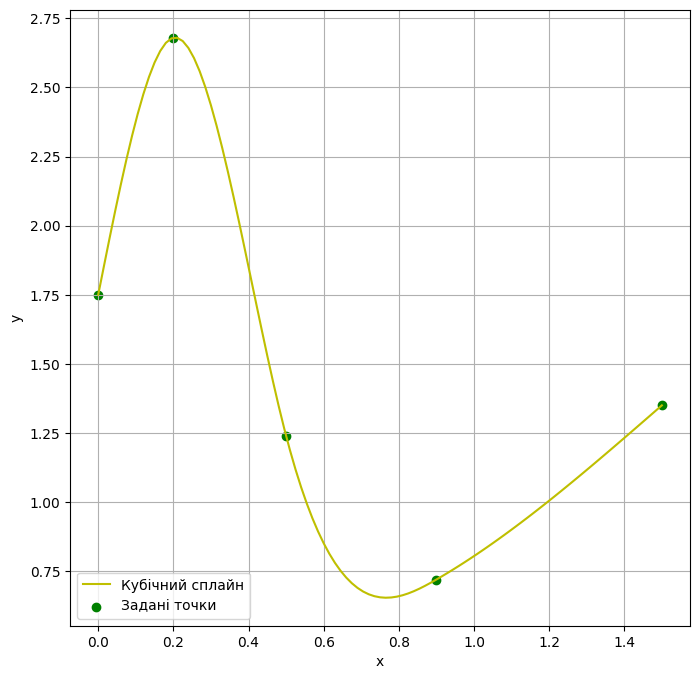

In [ ]:
# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 101)  # Діапазон для побудови графіка
y_values = [ ]# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='y')
plt.scatter(x, y, label="Задані точки", color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower left")
plt.grid()
plt.show()

#Варіант 2
**Перевірка за допомогою методу CubicSpline**

In [ ]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0, 0.2, 0.5, 0.9, 1.5])
y = np.array([1.75, 2.68, 1.24, 0.72, 1.35])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 37.7774*(x - 0.0)^3 + -45.3442*(x - 0.0)^2 + 12.2077*(x - 0.0) + 1.7500
S_2(x) = 37.7774*(x - 0.2)^3 + -22.6777*(x - 0.2)^2 + -1.3966*(x - 0.2) + 2.6800
S_3(x) = -6.4085*(x - 0.5)^3 + 11.3219*(x - 0.5)^2 + -4.8034*(x - 0.5) + 1.2400
S_4(x) = -6.4085*(x - 0.9)^3 + 3.6317*(x - 0.9)^2 + 1.1780*(x - 0.9) + 0.7200


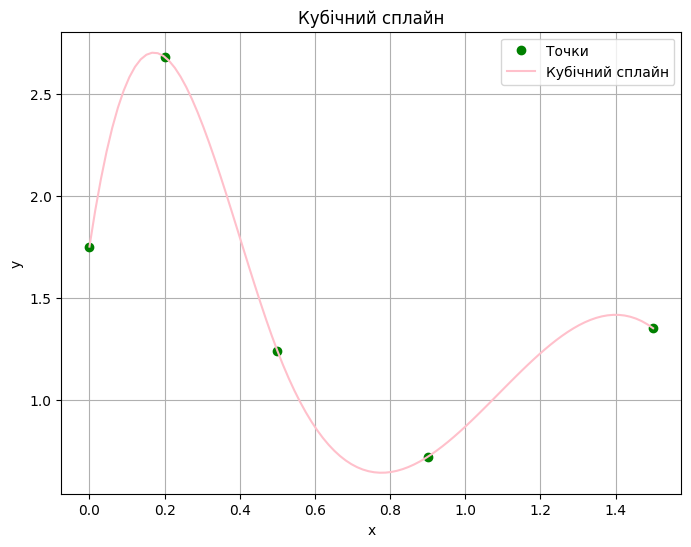

In [ ]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'go', label='Точки')
plt.plot(x_new, y_new, color='pink', label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

#Варіант 3. Побудова сплайну



Сплайни
S_1(x) = 2.68+0.29780487804878053*(x-0.2)-32.641463414634146*(x-0.2)^2-54.40243902439023*(x-0.2)^3, на [0;0.2]
S_2(x) = 1.24-5.203170731707318*(x-0.5)+14.304878048780491*(x-0.5)^2+52.16260162601626*(x-0.5)^3, на [0.2;0.5]
S_3(x) = 0.72+0.7843902439024395*(x-0.9)+0.6640243902439019*(x-0.9)^2-11.36737804878049*(x-0.9)^3, на [0.5;0.9]
S_4(x) = 1.35+1.1828048780487808*(x-1.5)+0.0*(x-1.5)^2-0.36890243902439*(x-1.5)^3, на [0.9;1.5]


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

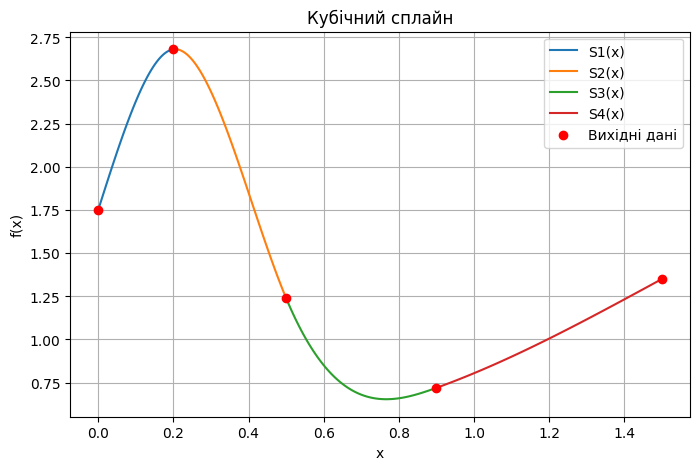

In [ ]:
def gauss(A, b):
    n = len(b)
    for i in range(n):
        # Pivoting
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]

        # Elimination
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]

    # Back substitution
    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        sum_ax = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

# Таблиця значень функції
x = [0, 0.2, 0.5, 0.9, 1.5]
f = [1.75, 2.68, 1.24, 0.72, 1.35]

d = len(x)

# Створюємо нульову матрицю А та нульовий вектор b
s = [0]*4*(d-1)
A = []
for i in range(4*(d-1)):
    A.append(s[:])
b = s[:]

# Відповідність сплайнів табличним значенням функції на лівих кінцях відрізків
for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]

# Відповідність сплайнів табличним значенням функції на правих кінцях відрізків
for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]

# Відповідність значень перших похідних сусідніх сплайнів
for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)

# Відповідність значень других похідних сусідніх сплайнів
for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])

# Крайові умови. Визначення нульових значень других похідних на кінцях відрізка
A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

# Обчислення коефіцієнтів сплайнів
c = gauss(A, b)

# Відображаємо сплайни
print('Сплайни')
for j in range(d-1):
    spline = 'S_' + str(j+1) + '(x) = ' + str(c[0+4*j]) + '+'
    for i in range(1, 4):
        spline += str(c[i+4*j]) + '*(x-' + str(x[j+1]) + ')^' + str(i) + '+'
    spline = spline[:-1].replace('+-', '-').replace('^1', '')
    spline += ', на [' + str(x[j]) + ';' + str(x[j+1]) + ']'
    print(spline)

    plt.figure(figsize=(8,5))

# Малюємо кожен сплайн
for j in range(d-1):
    Xs = np.linspace(x[j], x[j+1], 100)
    Y = c[0+4*j] + c[1+4*j]*(Xs - x[j+1]) + c[2+4*j]*(Xs - x[j+1])**2 + c[3+4*j]*(Xs - x[j+1])**3
    plt.plot(Xs, Y, label=f"S{j+1}(x)")

# Точки
plt.scatter(x, f, color='red', zorder=5, label='Вихідні дані')

plt.title('Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()